In [29]:
# Importing the neccesary libraries we are going to need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# IMPORT DATA

In [30]:
df = pd.read_csv('winedata.csv')
print(df.shape)
df.head(3)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


# DATA PREPROCESSING

##### DUPLICATED DATA - giá trị lặp

In [31]:
df[df.duplicated(keep='first')]
# df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


#### MISSING VALUES - giá trị thiếu

In [4]:
df.isnull().sum() #sum nulls

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### OUTLIERS DETECTION - giá trị ngoại lai

Data distribution before removing outliers

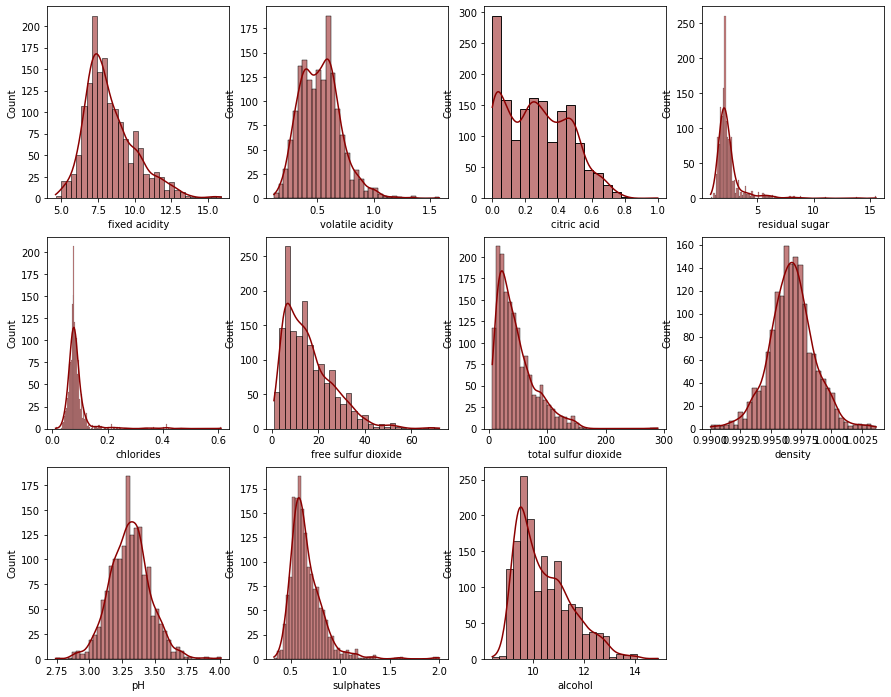

In [32]:
plt.figure(figsize=(15,12))
for ind, col in enumerate(df.columns[:-1]):
    plt.subplot(3,4, ind+1)
    sns.histplot(df[col], color='darkred', kde ='True')

Shapiro Test to confirm:
- Ho: data follows normal distribution
- H1: data doesnt follow normal distribution

If p<0.05: reject null hypo

In [33]:
from scipy.stats import shapiro
columns = []
stats = []
pvalue = []
check = []
for col in df.columns[:-1]:
    stat, p = shapiro(df[col])
    columns.append(col)
    stats.append(stat)
    pvalue.append(p)
    if p > 0.05:
        check.append('YES')
    else:
        check.append('NO')
df_shapiro = pd.DataFrame({'Columns':columns,'W value':stats, 'P value': pvalue,'Check':check})   
df_shapiro 

,Columns,W value,P value,Check
0,fixed acidity,0.942031,1.525595e-24,NO
1,volatile acidity,0.974334,2.686807e-16,NO
2,citric acid,0.955290,1.020820e-21,NO
3,residual sugar,0.566077,0.000000e+00,NO
4,chlorides,0.484247,0.000000e+00,NO
5,free sulfur dioxide,0.901841,7.697398e-31,NO
6,total sulfur dioxide,0.873225,3.574144e-34,NO
7,density,0.990867,1.940096e-08,NO
8,pH,0.993487,1.713695e-06,NO
9,sulphates,0.833043,5.821618e-38,NO


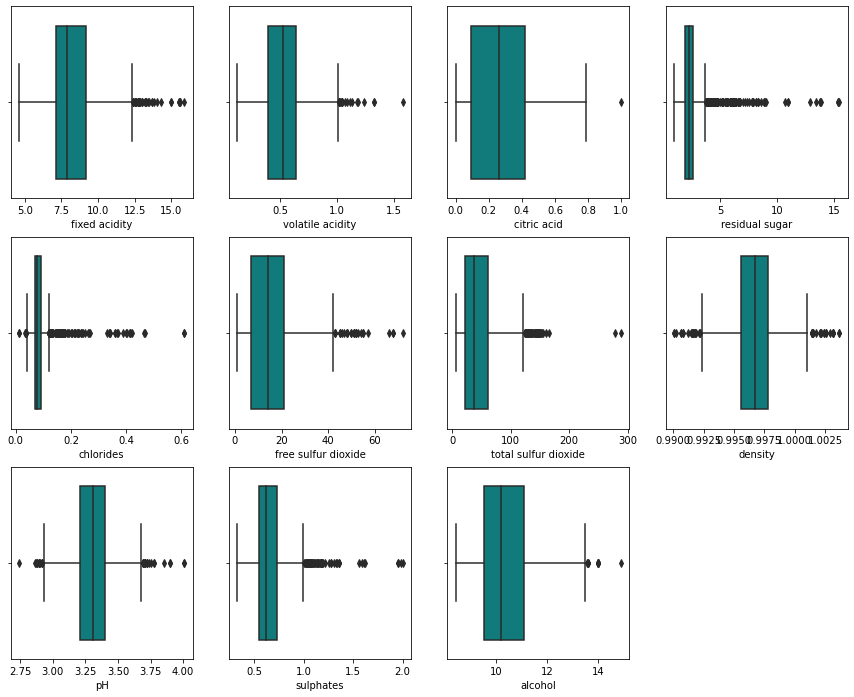

In [34]:
plt.figure(figsize=(15,12))
for ind, col in enumerate(df.columns[:-1]):
    plt.subplot(3,4, ind+1)
    sns.boxplot(data=df, x=col, color='darkcyan')

In [35]:
def iqr_outliers(seri):
    q1 = seri.quantile(0.25)
    q3 = seri.quantile(0.75)
    iqr = q3 - q1
    up_fence = q3 + 1.5*iqr 
    low_fence = q1 - 1.5*iqr 
    return low_fence, up_fence

for col in df.columns[:-1]:
    low, up = iqr_outliers(df[col])
    df = df[(df[col] > low) & (df[col] < up)]
df.shape

(1135, 12)

Distribution after removing outliers

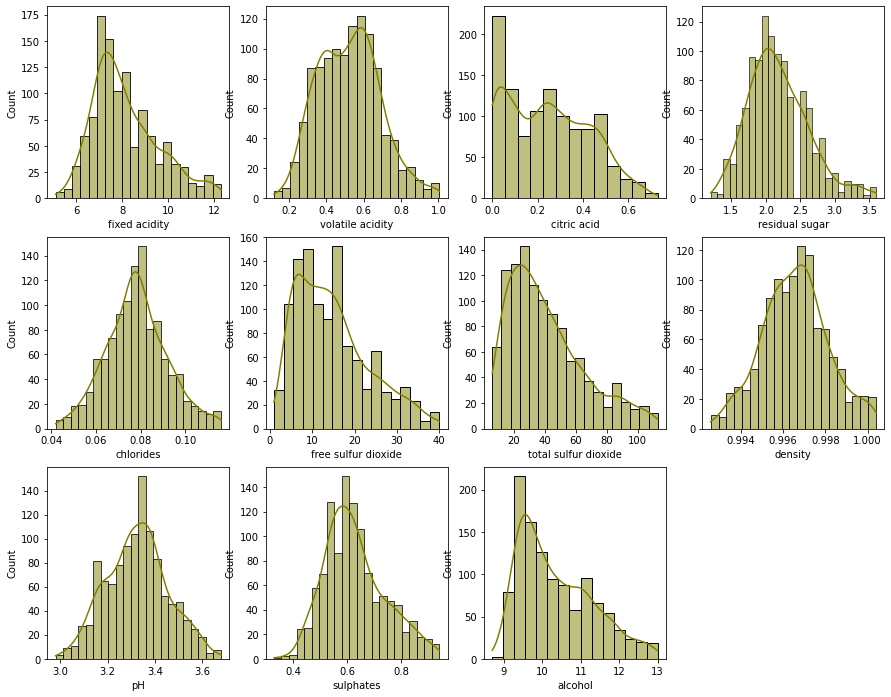

In [36]:
plt.figure(figsize=(15,12))
for ind, col in enumerate(df.columns[:-1]):
    plt.subplot(3,4, ind+1)
    sns.histplot(df[col], color='olive', kde='True')

In [10]:
from scipy.stats import shapiro
columns = []
stats = []
pvalue = []
check = []
for col in df.columns[:-1]:
    stat, p = shapiro(df[col])
    columns.append(col)
    stats.append(stat)
    pvalue.append(p)
    if p > 0.05:
        check.append('YES')
    else:
        check.append('NO')
df_shapiro = pd.DataFrame({'Columns':columns,'W value':stats, 'P value': pvalue,'Check':check})   
df_shapiro 

,Columns,W value,P value,Check
0,fixed acidity,0.949736,3.042299e-19,NO
1,volatile acidity,0.989474,2.884891e-07,NO
2,citric acid,0.950173,3.698178e-19,NO
3,residual sugar,0.970041,1.452219e-14,NO
4,chlorides,0.993689,9.744484e-05,NO
5,free sulfur dioxide,0.934339,6.141616e-22,NO
6,total sulfur dioxide,0.921644,7.966454e-24,NO
7,density,0.994618,4.357547e-04,NO
8,pH,0.994942,7.504770e-04,NO
9,sulphates,0.971477,3.710000e-14,NO


#### FEATURE SELECTION

CORRELATION

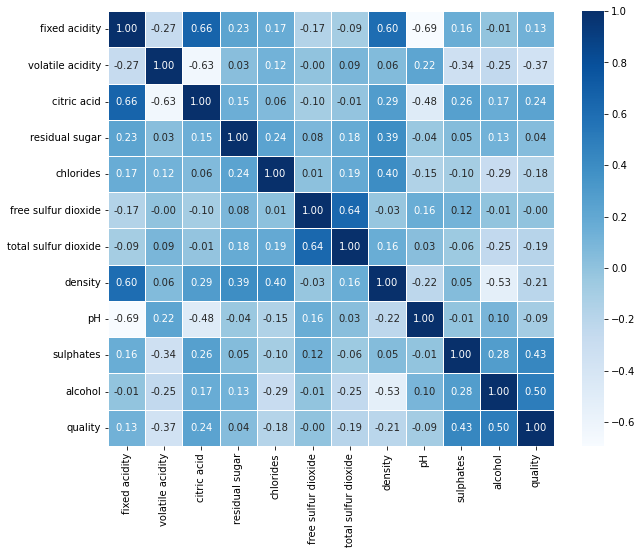

In [45]:
fig = plt.figure(figsize= (10,8))
sns.heatmap(df.corr(), annot=True, lw=.7, linecolor="white", fmt=".2f", cmap = 'Blues')
plt.show()

MULTICOLLINEARITY - đa cộng tuyến

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'grade') should not be included in variables
#Categorical variables may or maynot be added if any
variables = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]]
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

#Using 10 as the minimum vif values i.e any independent variable 10 and above will have to be dropped
#From the results all independent variable are below 10

C:\Anancoda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIF,features
0,2.539788e+06,const
1,6.809390e+00,fixed acidity
2,2.060065e+00,volatile acidity
3,3.148410e+00,citric acid
4,1.712597e+00,residual sugar
5,1.286184e+00,chlorides
6,1.906135e+00,free sulfur dioxide
7,2.096684e+00,total sulfur dioxide
8,6.416265e+00,density
9,3.111450e+00,pH


#### LABELING - gán nhãn

In [12]:
grade = [] 
for i in df['quality']: 
    if i > 6.5:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
df['grade'] = grade

#### STANDARDIZATION - chuẩn hóa dữ liệu

In [13]:
# independent variables: biến độc lập
x = df.drop(columns={'grade','quality'}, axis =1 )
# dependent variable: biến phụ thuộc
y = df['grade']

Normalization

In [14]:
# sts = StandardScaler()
# sts.fit(x)
# scaled_x = sts.transform(x)

Min Max

In [15]:
mms = MinMaxScaler()
mms.fit(x)
x=mms.transform(x)

# LOGISTIC REGRESSION

SPLIT DATASET - chia dữ liệu thành 2 phần train, test

In [16]:
#Splitting our data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state  = 365, stratify=y)

# x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state  = 365)

In [17]:
y_train.value_counts()/len(y_train)

0    0.877753
1    0.122247
Name: grade, dtype: float64

In [18]:
y_test.value_counts()/len(y_test)

0    0.876652
1    0.123348
Name: grade, dtype: float64

HANDLING IMBLANCED DATA

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 

# define pipeline 
sm = SMOTE(random_state=42) 
x_train, y_train = sm.fit_resample(x_train, y_train)

sm = SMOTE(random_state=42) 
x_test, y_test = sm.fit_resample(x_test, y_test)

In [20]:
y_test.value_counts()/len(y_test)

0    0.5
1    0.5
Name: grade, dtype: float64

In [21]:
y_train.value_counts()/len(y_train)

0    0.5
1    0.5
Name: grade, dtype: float64

GENERATING MODEL - tạo mô hình

In [22]:
reg = LogisticRegression() #select the algorithm
reg.fit(x_train,y_train) # we fit the algorithm with the training data and the training output

LogisticRegression()

PREDICTING THE TEST DATA - dự đoán bằng test data

In [23]:
y_hat = reg.predict(x_test) # y_hat holding the prediction made with the algorithm using x_test

ACCURACY - tính độ chính xác bằng y_hat so với y_test

In [24]:
acc = metrics.accuracy_score(y_hat,y_test)# To know the accuracy
print(f'ACCURACY = {acc}')

ACCURACY = 0.8291457286432161


EVALUATING

In [25]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
print('Accuracy = ' + str(accuracy_score(y_hat,y_test)))
print(confusion_matrix(y_hat, y_test))
print(classification_report(y_hat, y_test))

Accuracy = 0.8291457286432161
[[149  18]
 [ 50 181]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       167
           1       0.91      0.78      0.84       231

    accuracy                           0.83       398
   macro avg       0.83      0.84      0.83       398
weighted avg       0.84      0.83      0.83       398



PREDICTING NEW VALUE - dự đoán giá trị mới

In [26]:
reg.predict([[8,0.5,0.2,2.4,0.1,26,70,0.8,3.4,0.7,9]])

array([0], dtype=int64)

# DECISION TREE

In [27]:
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
dd = DecisionTreeClassifier()
dd.fit(x_train,y_train)
y_1 = dd.predict(x_test)
acc_1 = metrics.accuracy_score(y_1,y_test)
print(f'ACCURACY = {acc_1}')

ACCURACY = 0.7763819095477387


# USE JOBLIB TO PACK MODEL

In [ ]:
import joblib
joblib.dump(reg,'final_model.sav')